## Navigate to models
- [Models](#Models)

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [125]:
os.chdir(r"C:\Users\Documents\Applied Machine Learning\Group project\Uber Vs Lyft\dataset")
rideshare=pd.read_csv("rideshare_kaggle.csv")
rideshare.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Data Preprocessing

In [126]:
rideshare.shape

(693071, 57)

In [127]:
rideshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [128]:
################################################################################################
# number of numerical and categorical variables

# Get the data types of all columns
column_types = rideshare.dtypes

# Count the numerical and categorical columns
numerical_count = sum(column_types == 'int64') + sum(column_types == 'float64')
categorical_count = sum(column_types == 'object')

print("Total numerical columns:", numerical_count)
print("Total categorical columns:", categorical_count)

Total numerical columns: 46
Total categorical columns: 11


In [129]:
#Converting Datetime column to datetime datatype
rideshare['datetime']=pd.to_datetime(rideshare['datetime'])

In [130]:
# Checking if there are duplicated rows
print('{} of data is duplicated rows'.format(
    str(round(rideshare.duplicated().sum() / rideshare.size * 100,5))+'%'))

0.0% of data is duplicated rows


In [131]:
# Checking if there are Nulvalues
print('{} of data is NuLL'.format(
    str(round(rideshare.isna().sum().sum() / rideshare.size * 100,3))+'%'))

0.139% of data is NuLL


In [132]:
#Checking the distribution of null values
cols = rideshare.columns
#sns.heatmap(rideshare[cols].isnull())
print(rideshare.isna().sum())
# only price columns has all the null values

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [133]:
# to remove the null records
rideshare.dropna(axis=0,inplace=True)

In [134]:
updated_null_records = rideshare.isnull().sum().sum()
updated_null_records

np.int64(0)

In [135]:
# visibility and visibility.1 are duplicate columns hence removing
## self comment - df['visibility'].sum() check using this and see if you get the same total with vis1 or
visibilityCheck = rideshare['visibility'].equals(rideshare['visibility.1'])
print(visibilityCheck)
rideshare = rideshare.drop(['visibility.1'],axis=1)
print("Dropped Visibilty.1")

True
Dropped Visibilty.1


In [136]:
rideshare.shape

(637976, 56)

In [137]:
# dropping some columns from domain knowledge
rideshare = rideshare.drop(['id','timestamp','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','temperatureHighTime','apparentTemperatureMaxTime'
                 ,'latitude','longitude','product_id','hour','day','month'],axis = 1)
print(rideshare.shape)
rideshare.head

(637976, 36)


<bound method NDFrame.head of                   datetime          timezone            source    destination  \
0      2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1      2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2      2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3      2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4      2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   
...                    ...               ...               ...            ...   
693065 2018-12-01 23:53:05  America/New_York          West End      North End   
693066 2018-12-01 23:53:05  America/New_York          West End      North End   
693067 2018-12-01 23:53:05  America/New_York          West End      North End   
693069 2018-12-01 23:53:05  America/New_York          West End      North End   
693070 2018-12-01 23:53:05  America/New_York          West End      North End  

In [138]:
# Delete data time and Year because all data in the same year
rideshare = rideshare.drop(['datetime'],axis = 1)
print(rideshare.shape)
rideshare.head()

(637976, 35)


,timezone,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,apparentTemperature,...,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,America/New_York,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,37.12,...,57,0.72,0,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,America/New_York,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,37.35,...,90,1.00,0,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,America/New_York,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,32.93,...,240,0.03,0,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,America/New_York,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,29.63,...,310,0.00,0,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,America/New_York,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,30.88,...,303,0.44,0,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


In [139]:
# Delete timezone because all data is in the same timezone
rideshare = rideshare.drop(['timezone'],axis = 1)
print(rideshare.shape)
rideshare.head()

(637976, 34)


,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,...,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,37.12,Mostly Cloudy,...,57,0.72,0,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,37.35,Rain,...,90,1.00,0,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,32.93,Clear,...,240,0.03,0,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,29.63,Clear,...,310,0.00,0,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,30.88,Partly Cloudy,...,303,0.44,0,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


Correlation of temperature related features with our target feature (Price)

In [140]:
temp_cols= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']

In [141]:
df_temp = rideshare[temp_cols]
df_temp.head()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,42.18,29.11,35.75,9.0


<Axes: >

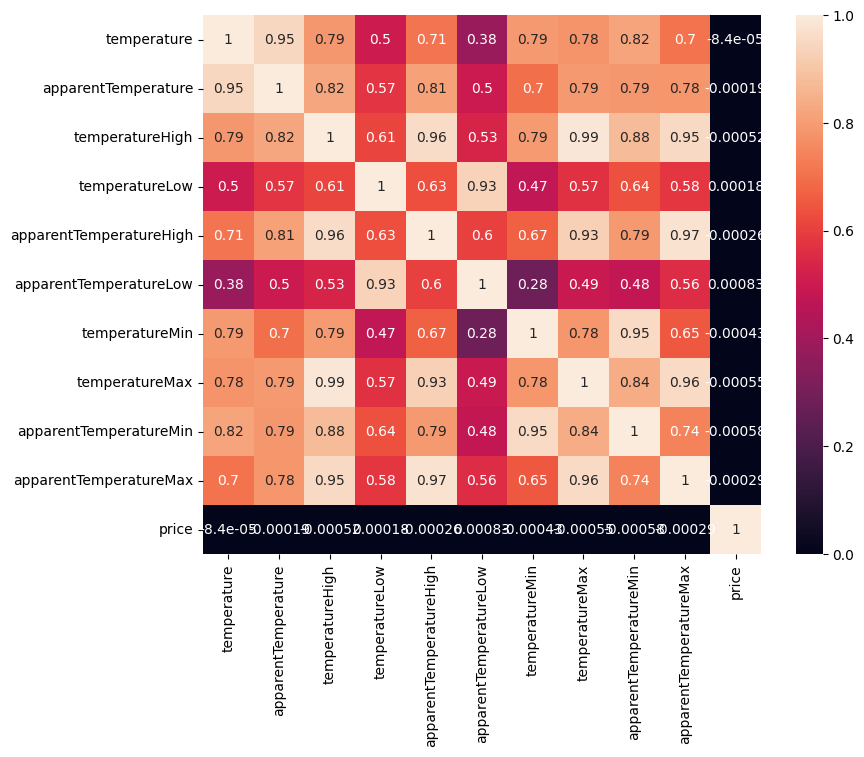

In [142]:
plt.figure(figsize=(9,7))
sns.heatmap(df_temp.corr(),annot=True)

In [143]:
#dropping the above columns
temp_cols= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureMax','apparentTemperatureMin','apparentTemperatureMax']
rideshare = rideshare.drop(temp_cols,axis=1)

check the correlation of our Climate related features with our target feature (Price)

In [144]:
climate_column = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']
df_clim = rideshare[climate_column]
df_clim.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,5.0
1,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,11.0
2,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,7.0
3,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000,26.0
4,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001,9.0


<Axes: >

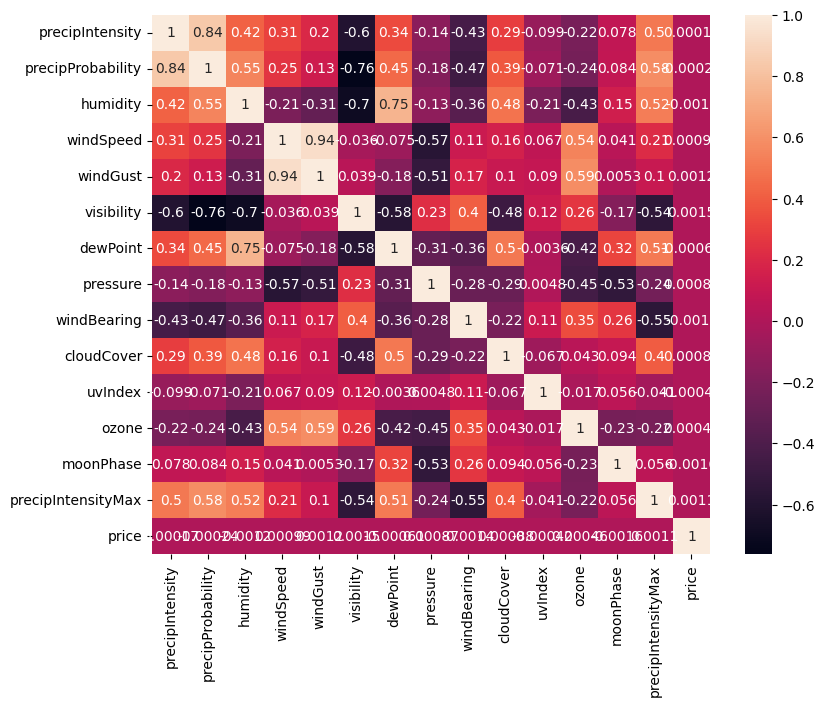

In [145]:
plt.figure(figsize=(9,7))
sns.heatmap(df_clim.corr(),annot=True)

In [146]:
rideshare = rideshare.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)
rideshare.shape

(637976, 11)

Correlation of our categorical features with our target feature (price)

In [147]:
new_cat = ['source',
 'destination',
 'cab_type',
 'name',
 'short_summary',
 'icon','price']

df_cat = rideshare[new_cat]
df_cat.head()

,source,destination,cab_type,name,short_summary,icon,price
0,Haymarket Square,North Station,Lyft,Shared,Mostly Cloudy,partly-cloudy-night,5.0
1,Haymarket Square,North Station,Lyft,Lux,Rain,rain,11.0
2,Haymarket Square,North Station,Lyft,Lyft,Clear,clear-night,7.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,Clear,clear-night,26.0
4,Haymarket Square,North Station,Lyft,Lyft XL,Partly Cloudy,partly-cloudy-night,9.0


In [148]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode= df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])
df_cat_encode

,source,destination,cab_type,name,short_summary,icon,price
0,5,7,0,7,4,5,5.0
1,5,7,0,2,8,6,11.0
2,5,7,0,5,0,1,7.0
3,5,7,0,4,0,1,26.0
4,5,7,0,6,6,5,9.0
...,...,...,...,...,...,...,...
693065,11,6,1,11,6,5,9.5
693066,11,6,1,10,6,5,13.0
693067,11,6,1,9,6,5,9.5
693069,11,6,1,1,6,5,27.0


In [149]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
categorical_vars = ['source', 'destination', 'cab_type', 'name', 'short_summary', 'icon']


for var in categorical_vars:
    print(f"\nANOVA Test for {var} (categorical) and price (dependent variable):\n")

    
    anova_data = rideshare[['price', var]].dropna()

    anova_data[var] = anova_data[var].astype('category')

   
    model = ols(f'price ~ C({var})', data=anova_data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    print(anova_table)


ANOVA Test for source (categorical) and price (dependent variable):

                 sum_sq        df            F  PR(>F)
C(source)  1.382476e+06      11.0  1482.453058     0.0
Residual   5.408541e+07  637964.0          NaN     NaN

ANOVA Test for destination (categorical) and price (dependent variable):

                      sum_sq        df            F  PR(>F)
C(destination)  1.250215e+06      11.0  1337.356566     0.0
Residual        5.421767e+07  637964.0          NaN     NaN

ANOVA Test for cab_type (categorical) and price (dependent variable):

                   sum_sq        df            F  PR(>F)
C(cab_type)  3.856740e+05       1.0  4466.959446     0.0
Residual     5.508221e+07  637974.0          NaN     NaN

ANOVA Test for name (categorical) and price (dependent variable):

                sum_sq        df              F  PR(>F)
C(name)   4.294443e+07      11.0  198877.843591     0.0
Residual  1.252345e+07  637964.0            NaN     NaN

ANOVA Test for short_summary (

<Axes: >

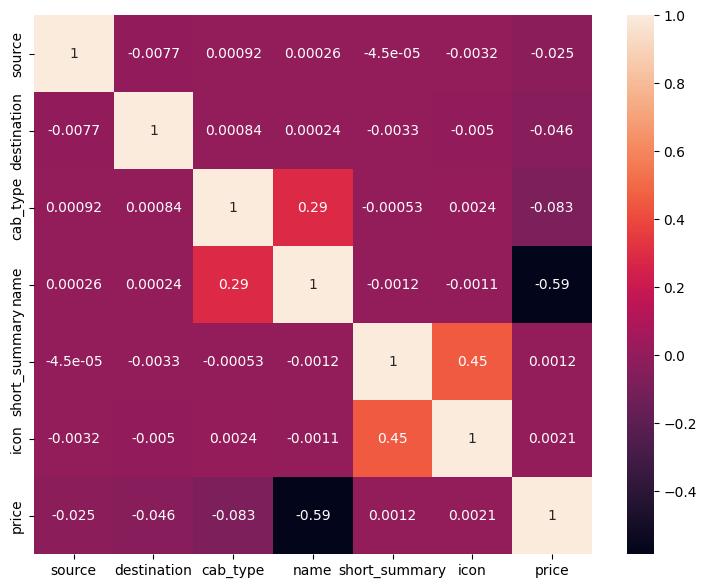

In [150]:
plt.figure(figsize=(9,7))
sns.heatmap(df_cat_encode.corr(),annot=True)

In [151]:
cols_categorical_drop = ['short_summary','icon','long_summary']
rideshare = rideshare.drop(cols_categorical_drop,axis = 1)
rideshare.head()


,source,destination,cab_type,name,price,distance,surge_multiplier,visibility
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,10.000
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,4.786
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,10.000
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,10.000
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,10.000


In [152]:
print(rideshare.columns)
rideshare_df = rideshare

Index(['source', 'destination', 'cab_type', 'name', 'price', 'distance',
       'surge_multiplier', 'visibility'],
      dtype='object')


In [153]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# column indices to be one-hot encoded
categorical_columns = [0, 1, 2, 3]

#ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')


rideshare_encoded = ct.fit_transform(rideshare_df).toarray()


In [154]:

# Get the feature names after encoding
encoded_column_names = ct.named_transformers_['encoder'].get_feature_names_out(input_features=rideshare_df.columns[categorical_columns])

# Create a DataFrame with the encoded data and feature names
rideshare_encoded = pd.DataFrame(rideshare_encoded, columns=list(encoded_column_names) + list(rideshare_df.columns.drop(rideshare_df.columns[categorical_columns])))


In [155]:
#We can see only name feature that has a relatively strong correlation.
# Source,destination, and cab_type features have relatively weak correlation, let us select cab_type feature because it has stronger correlation than other two features. Dropping rest of the columns.

In [156]:
rideshare_encoded.head()
print(rideshare_encoded.columns)


Index(['source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'cab_type_Lyft', 'cab_type_Uber', 'name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV', 'price', 'distance',
       'surge_multipli

In [157]:
rideshare1 = rideshare_encoded
print(rideshare1.columns)
rideshare1.head()

Index(['source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'cab_type_Lyft', 'cab_type_Uber', 'name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV', 'price', 'distance',
       'surge_multipli

,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,...,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,price,distance,surge_multiplier,visibility
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.44,1.0,10.000
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.44,1.0,4.786
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.44,1.0,10.000
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.44,1.0,10.000
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,9.0,0.44,1.0,10.000


In [158]:
rideshare1.columns

Index(['source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'cab_type_Lyft', 'cab_type_Uber', 'name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV', 'price', 'distance',
       'surge_multipli

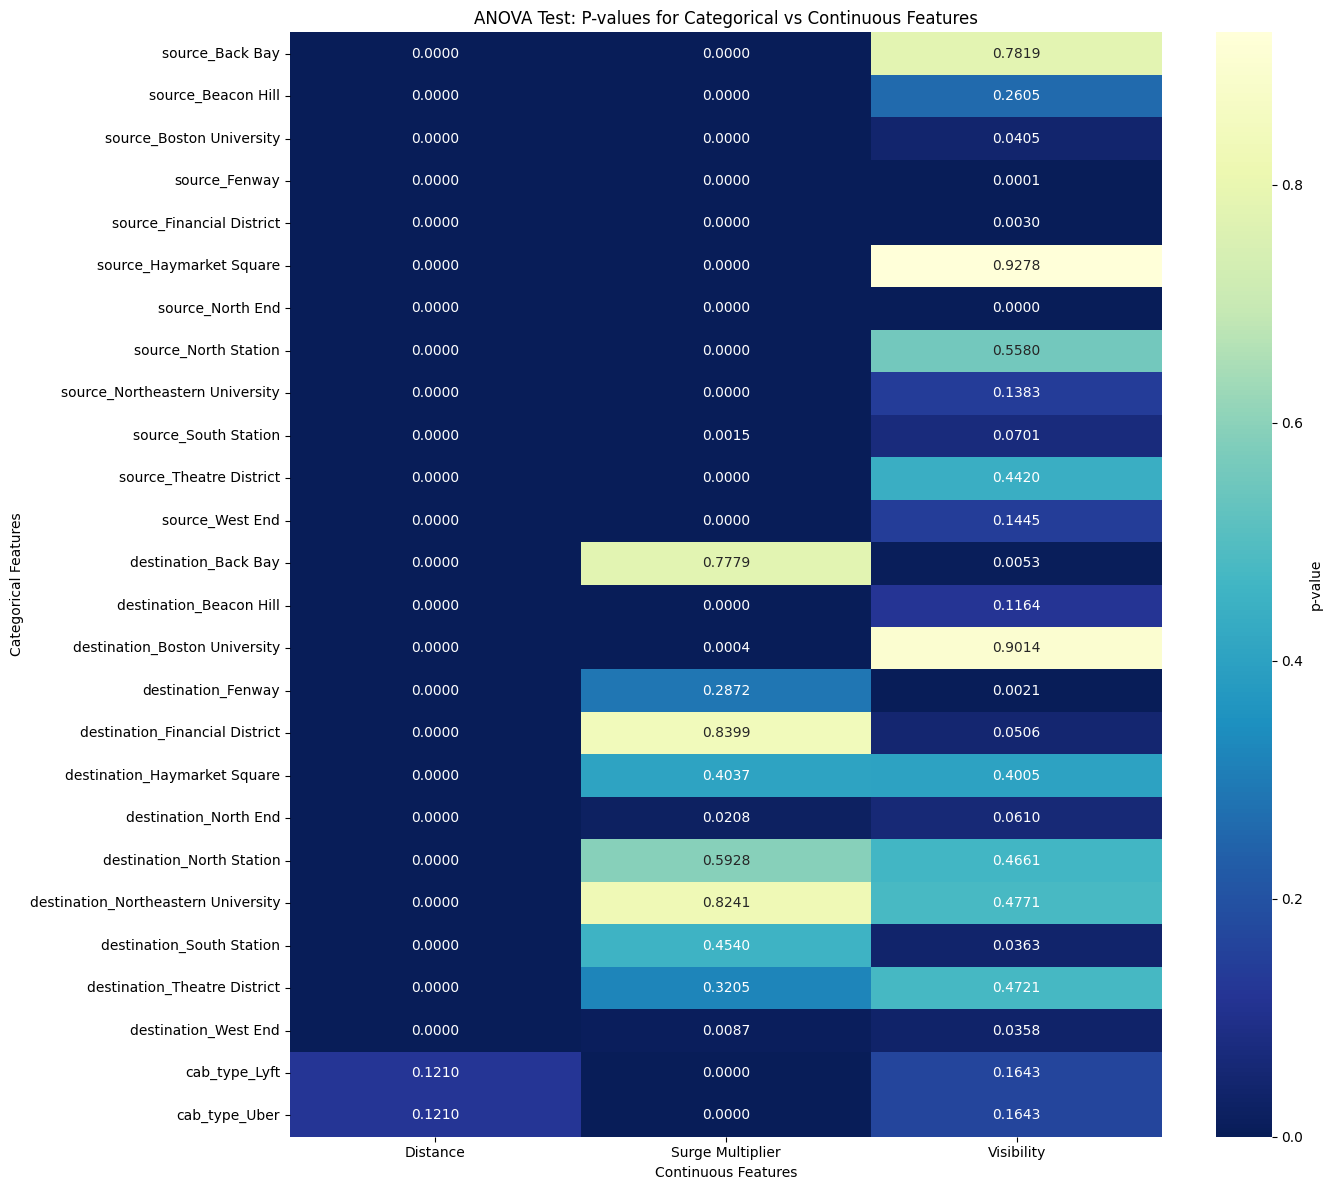

In [159]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


def perform_anova_analysis(rideshare1):
   
    categorical_columns = [
        'source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'cab_type_Lyft', 'cab_type_Uber'
    ]


    continuous_features = [
        'distance', 
        'surge_multiplier', 
        'visibility'
    ]

  
    anova_results = {}

   
    for cat_col in categorical_columns:
        anova_results[cat_col] = {}
        
        for cont_feature in continuous_features:
       
            groups = [group[cont_feature].values for name, group in rideshare1.groupby(cat_col)]
            #one-way ANOVA
            f_statistic, p_value = stats.f_oneway(*groups)
            
            anova_results[cat_col][cont_feature] = {
                'f_statistic': f_statistic,
                'p_value': p_value
            }
    
    return anova_results
def visualize_anova_results(anova_results):
    # heatmap of p-values
    p_values_matrix = np.zeros((len(anova_results), 3))
    
    categorical_columns = list(anova_results.keys())
    continuous_features = list(list(anova_results.values())[0].keys())
    
    for i, cat_col in enumerate(categorical_columns):
        for j, cont_feature in enumerate(continuous_features):
            p_values_matrix[i, j] = anova_results[cat_col][cont_feature]['p_value']
    
    # heatmap
    plt.figure(figsize=(14, 12))
    sns.heatmap(p_values_matrix, 
                annot=True, 
                cmap='YlGnBu_r', 
                xticklabels=['Distance', 'Surge Multiplier', 'Visibility'], 
                yticklabels=categorical_columns,
                cbar_kws={'label': 'p-value'},
                fmt='.4f') 
    plt.title('ANOVA Test: P-values for Categorical vs Continuous Features')
    plt.xlabel('Continuous Features')
    plt.ylabel('Categorical Features')
    plt.tight_layout()
    plt.show()


anova_results = perform_anova_analysis(rideshare1)

# Visualize 
visualize_anova_results(anova_results)

Dropping source, destination, and cab_type columns as they are correlated with Visibility and Surge Multiplier

In [160]:
cols_drop1 = ['source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'cab_type_Lyft', 'cab_type_Uber']
rideshare1 = rideshare_encoded.drop(cols_drop1,axis = 1)

In [161]:
rideshare1.head()

,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,price,distance,surge_multiplier,visibility
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.44,1.0,10.000
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.44,1.0,4.786
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.44,1.0,10.000
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.44,1.0,10.000
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,0.44,1.0,10.000


Scaling

In [162]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#previously encoded and transformed data
rideshare_standardized = scaler.fit_transform(rideshare1.drop('price',axis=1))

# Converting the scaled array back into a DataFrame with original column names
rideshare_standardized_df = pd.DataFrame(rideshare_standardized, columns=rideshare1.drop('price',axis=1).columns)


In [163]:
rideshare_standardized_df.head()
print(rideshare_standardized_df.columns)
print(rideshare_standardized_df.shape)

Index(['name_Black', 'name_Black SUV', 'name_Lux', 'name_Lux Black',
       'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL', 'name_Shared',
       'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV', 'distance',
       'surge_multiplier', 'visibility'],
      dtype='object')
(637976, 15)


In [164]:
from sklearn.model_selection import train_test_split
X = rideshare_standardized_df
y = rideshare['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [165]:
y.isna().sum()

np.int64(0)

In [166]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   name_Black         637976 non-null  float64
 1   name_Black SUV     637976 non-null  float64
 2   name_Lux           637976 non-null  float64
 3   name_Lux Black     637976 non-null  float64
 4   name_Lux Black XL  637976 non-null  float64
 5   name_Lyft          637976 non-null  float64
 6   name_Lyft XL       637976 non-null  float64
 7   name_Shared        637976 non-null  float64
 8   name_UberPool      637976 non-null  float64
 9   name_UberX         637976 non-null  float64
 10  name_UberXL        637976 non-null  float64
 11  name_WAV           637976 non-null  float64
 12  distance           637976 non-null  float64
 13  surge_multiplier   637976 non-null  float64
 14  visibility         637976 non-null  float64
dtypes: float64(15)
memory usage: 73.0 MB


## Models


Decision Tree Regressor

In [167]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Initialize the Decision Tree Regressor
opt_tree = DecisionTreeRegressor(random_state=0)

# Define the parameter grid
param_grid_dt = {'max_depth': range(1, 21)}

# Perform Grid Search with 5-fold cross-validation
grid_search_dt = GridSearchCV(opt_tree, param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

# Get the best max_depth parameter
best_parameter_dt = grid_search_dt.best_params_['max_depth']
print("Best max_depth chosen:", best_parameter_dt)

# Use the best estimator from the GridSearchCV
best_tree_model = grid_search_dt.best_estimator_

# Calculate predictions
y_DT_train_pred = best_tree_model.predict(X_train)
y_DT_test_pred = best_tree_model.predict(X_test)

# Calculate and report the MSEs
mse_train = mean_squared_error(y_train, y_DT_train_pred)
mse_test = mean_squared_error(y_test, y_DT_test_pred)

print("MSE on Training Data is:", np.round(mse_train, 3))
print("MSE on Testing Data is:", np.round(mse_test, 3))

# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print("RMSE on Training Data is:", np.round(rmse_train, 3))
print("RMSE on Testing Data is:", np.round(rmse_test, 3))


r2_train = r2_score(y_train, y_DT_train_pred)
r2_test = r2_score(y_test, y_DT_test_pred)

print("R-squared on Training Data:", np.round(r2_train, 3))
print("R-squared on Testing Data:", np.round(r2_test, 3))



Best max_depth chosen: 13
MSE on Training Data is: 2.941
MSE on Testing Data is: 3.249
RMSE on Training Data is: 1.715
RMSE on Testing Data is: 1.803
R-squared on Training Data: 0.966
R-squared on Testing Data: 0.962


Random Forest Regressor

In [168]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
random_forest_regressor = RandomForestRegressor(random_state=0)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [169]:
y_pred = random_forest_regressor.predict(X_test)

In [170]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 1.2437075147342338
Root Mean Squared Error (RMSE): 1.9195672632846437
R-squared (R²): 0.9572835911454162


In [171]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest Regressor
Random_Forest = RandomForestRegressor(n_estimators=100, random_state=0)

# Define the hyperparameter grid
param_grid_rt = {

    'max_depth':  [19],
    'n_estimators': [150]

}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_rt = GridSearchCV(Random_Forest, param_grid_rt, cv=5)
grid_search_rt.fit(X_train, y_train)

# Get the best parameters and the best model
print("Best Hyperparameters:", grid_search_rt.best_params_)
best_model = grid_search_rt.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Best Hyperparameters: {'max_depth': 19, 'n_estimators': 150}
Mean Absolute Error (MAE): 1.1619653317765908
Root Mean Squared Error (RMSE): 1.7902069450543345
R-squared (R²): 0.9628469441543996


In [172]:
# Predictions for training and testing data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluate the model on the training data
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model on the testing data
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("Training Data:")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"R-squared (R²): {r2_train}\n")

print("Testing Data:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"R-squared (R²): {r2_test}")



Training Data:
Mean Squared Error (MSE): 2.226983902413569
Mean Absolute Error (MAE): 0.9875378019300346
Root Mean Squared Error (RMSE): 1.4923082464469493
R-squared (R²): 0.9744716554694931

Testing Data:
Mean Squared Error (MSE): 3.2048409061207734
Mean Absolute Error (MAE): 1.1619653317765908
Root Mean Squared Error (RMSE): 1.7902069450543345
R-squared (R²): 0.9628469441543996


CLASSIFICATION

data split into 6 categories

In [173]:
price_bins = [0, 5, 10, 15, 20, 25, np.inf]  # Ranges for categories
price_labels = ['Very Low', 'Low', 'Below Average', 'Average', 'High', 'Very High']

RANDOM FOREST

In [174]:
rideshare['price_category'] = pd.cut(rideshare['price'], bins=price_bins, labels=price_labels, right=False)

# Check the distribution of categories
print(rideshare['price_category'].value_counts())

price_category
Low              178445
Very High        142544
Below Average    139715
Average          119066
High              46970
Very Low          11236
Name: count, dtype: int64


In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

#Update Target Variable
X = rideshare_standardized_df  # Already standardized features
y = rideshare['price_category']  # New target variable (categorical)

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

#Make Predictions
y_pred = classifier.predict(X_test)

#Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[29565  3202  2459   369   124     1]
 [ 2522 31801    72  7473    23    23]
 [ 2907   217  9026    31  1910     0]
 [  126  6110     7 45952     0  1339]
 [  378    65  2209     0 40111     0]
 [    0    24     0  2370     0   977]]

Classification Report:
               precision    recall  f1-score   support

      Average       0.83      0.83      0.83     35720
Below Average       0.77      0.76      0.76     41914
         High       0.66      0.64      0.65     14091
          Low       0.82      0.86      0.84     53534
    Very High       0.95      0.94      0.94     42763
     Very Low       0.42      0.29      0.34      3371

     accuracy                           0.82    191393
    macro avg       0.74      0.72      0.73    191393
 weighted avg       0.82      0.82      0.82    191393



Decision tree

Best max_depth for Decision Tree Classifier: 15

Confusion Matrix:
[[30457  2914  1985   349    15     0]
 [ 2103 32623     2  7185     0     1]
 [ 2767   210  9386    25  1703     0]
 [    6  4819     0 48008     0   701]
 [  413    65  2004     0 40281     0]
 [    0     1     0  2552     0   818]]

Classification Report:
               precision    recall  f1-score   support

      Average       0.85      0.85      0.85     35720
Below Average       0.80      0.78      0.79     41914
         High       0.70      0.67      0.68     14091
          Low       0.83      0.90      0.86     53534
    Very High       0.96      0.94      0.95     42763
     Very Low       0.54      0.24      0.33      3371

     accuracy                           0.84    191393
    macro avg       0.78      0.73      0.75    191393
 weighted avg       0.84      0.84      0.84    191393

Accuracy of the Decision Tree Classifier: 0.84419


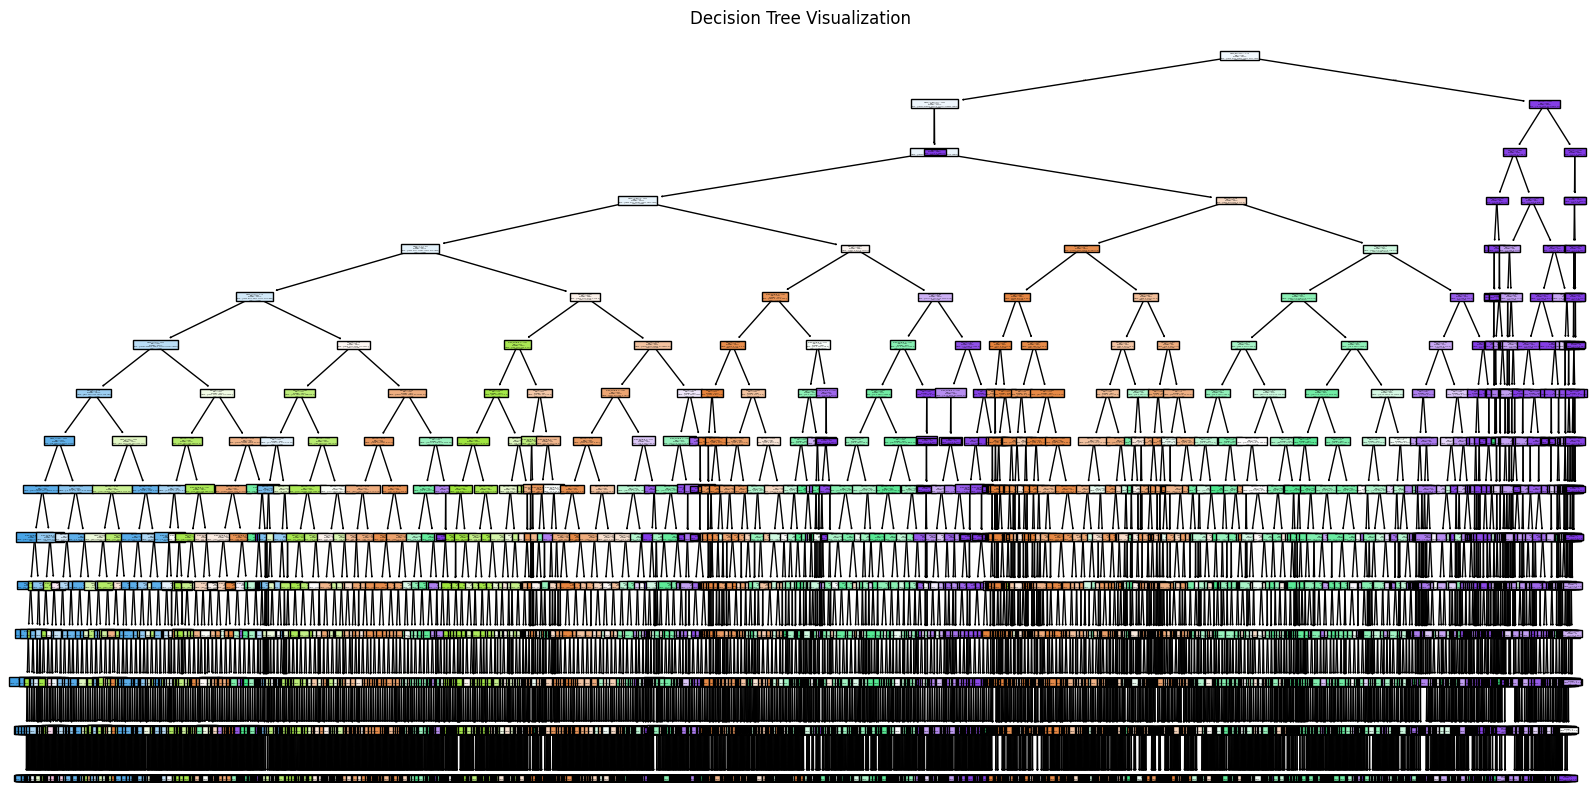

In [176]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

# Define the classifier
dt_classifier = DecisionTreeClassifier(random_state=0)

# Define the hyperparameter grid
param_grid_dt = {'max_depth': range(1, 21)}

# Perform Grid Search with 5-fold cross-validation
grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

# Get the best max_depth parameter
best_max_depth = grid_search_dt.best_params_['max_depth']
print(f"Best max_depth for Decision Tree Classifier: {best_max_depth}")

# Train the classifier with the best parameters
best_dt_classifier = grid_search_dt.best_estimator_

# Make predictions
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree Classifier: {accuracy:.5f}")

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt_classifier, filled=True, feature_names=X.columns, class_names=price_labels)
plt.title("Decision Tree Visualization")
plt.show()

RandomForest hyperparameter tuning 

In [177]:
param_grid_rf = {
    'n_estimators': [150],
    'max_depth': [10, 15, 11,12,13,14],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1],
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=0), param_grid_rf, cv=5, scoring='f1_weighted')
grid_search_rf.fit(X_train, y_train)

#Make Predictions
y_pred = grid_search_rf.predict(X_test)

#Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Best Parameters:", grid_search_rf.best_params_)

c:\Users\ayman\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Confusion Matrix:
[[30469  2971  1937   341     2     0]
 [ 2048 32859     0  7006     0     1]
 [ 2718   217  9533    27  1596     0]
 [    0  4952     0 47993     0   589]
 [  383    70  1956     0 40354     0]
 [    0     1     0  2685     0   685]]

Classification Report:
               precision    recall  f1-score   support

      Average       0.86      0.85      0.85     35720
Below Average       0.80      0.78      0.79     41914
         High       0.71      0.68      0.69     14091
          Low       0.83      0.90      0.86     53534
    Very High       0.96      0.94      0.95     42763
     Very Low       0.54      0.20      0.29      3371

     accuracy                           0.85    191393
    macro avg       0.78      0.73      0.74    191393
 weighted avg       0.84      0.85      0.84    191393

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


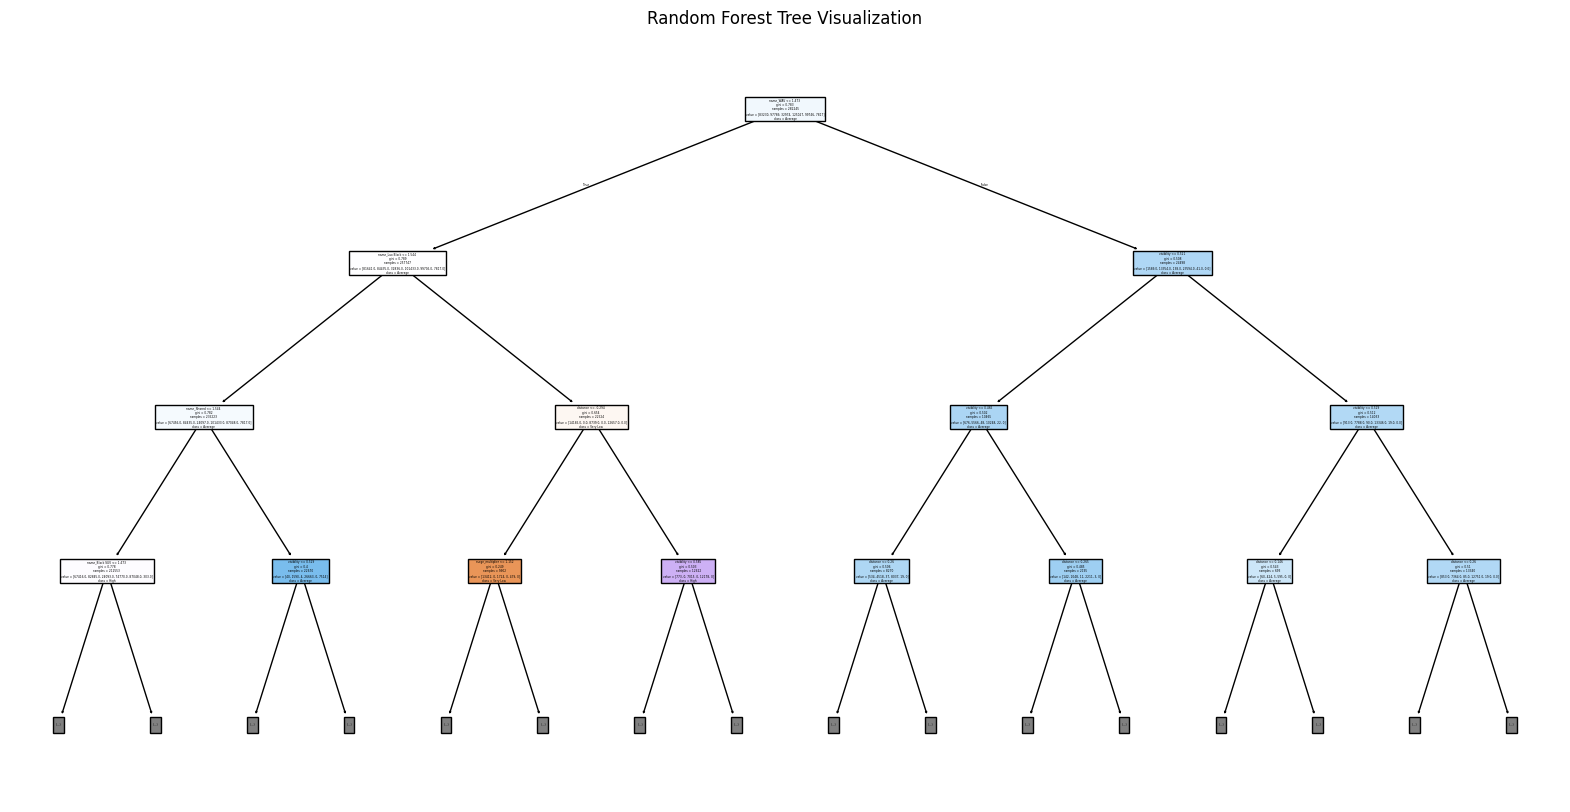

In [178]:
from sklearn.tree import plot_tree

# Extract a single tree from the Random Forest
best_model = grid_search_rf.best_estimator_
single_tree = best_model.estimators_[0]  # Visualize the first tree

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, filled=True, feature_names=X.columns, class_names=price_labels, max_depth=3)
plt.title("Random Forest Tree Visualization")
plt.show()

In [179]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the random  forest Classifier: {accuracy:.5f}")

Accuracy of the random  forest Classifier: 0.84587


XGBoost

In [180]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Encode the target variable with ordinal mapping
price_labels = ['Very Low', 'Low', 'Below Average', 'Average', 'High', 'Very High']
y_train_ordered = pd.Categorical(y_train, categories=price_labels, ordered=True)
y_test_ordered = pd.Categorical(y_test, categories=price_labels, ordered=True)

y_train_encoded = y_train_ordered.codes
y_test_encoded = y_test_ordered.codes

# Initialize the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [150],
    'max_depth': [10, 15, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [1.0],
    'colsample_bytree': [0.8]
}

# Perform Grid Search with 5-fold cross-validation
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid_xgb, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train_encoded)

# Best parameters
print("Best Parameters:", grid_search_xgb.best_params_)

# Make predictions
y_pred_xgb_encoded = grid_search_xgb.predict(X_test)

# Decode predictions back to original labels
y_pred_xgb = [price_labels[label] for label in y_pred_xgb_encoded]

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy of XGBoost classifier: {accuracy:.5f}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits


c:\Users\ayman\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:49:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150, 'subsample': 1.0}

Confusion Matrix:
[[30228  3199  1927   360     6     0]
 [ 1757 32893     0  7263     0     1]
 [ 2733   216  9474    30  1638     0]
 [    0  4393     0 48392     0   749]
 [  381    73  1893     0 40416     0]
 [    0     0     0  2528     0   843]]

Classification Report:
               precision    recall  f1-score   support

      Average       0.86      0.85      0.85     35720
Below Average       0.81      0.78      0.80     41914
         High       0.71      0.67      0.69     14091
          Low       0.83      0.90      0.86     53534
    Very High       0.96      0.95      0.95     42763
     Very Low       0.53      0.25      0.34      3371

     accuracy                           0.85    191393
    macro avg       0.78      0.73      0.75    191393
 weighted avg       0.84      0.85      0.84    191393

Accuracy of XGBoost classifier: 0.84771


Fitting 5 folds for each of 36 candidates, totalling 180 fits


c:\Users\ayman\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:24:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150, 'subsample': 0.8}

Confusion Matrix:
[[30155  3189  2012   358     6     0]
 [ 1778 32897     0  7238     0     1]
 [ 2655   216  9523    28  1669     0]
 [    0  4414     0 48410     0   710]
 [  374    74  1888     0 40427     0]
 [    0     0     0  2582     0   789]]

Classification Report:
               precision    recall  f1-score   support

      Average       0.86      0.84      0.85     35720
Below Average       0.81      0.78      0.80     41914
         High       0.71      0.68      0.69     14091
          Low       0.83      0.90      0.86     53534
    Very High       0.96      0.95      0.95     42763
     Very Low       0.53      0.23      0.32      3371

     accuracy                           0.85    191393
    macro avg       0.78      0.73      0.75    191393
 weighted avg       0.84      0.85      0.84    191393



<Figure size 1200x800 with 0 Axes>

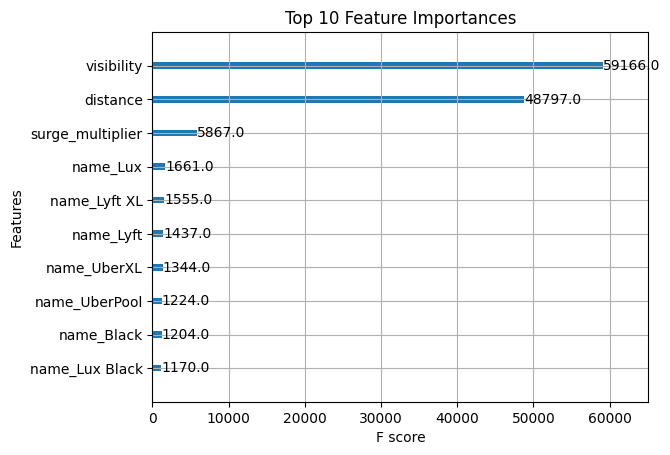

In [181]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Assigning weights (using sklearn's class_weight for multi-class handling)
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced', classes=np.unique(y_train_encoded), y=y_train_encoded)
class_weights = dict(enumerate(weights))

# Encode the target variable with ordinal mapping
price_labels = ['Very Low', 'Low', 'Below Average', 'Average', 'High', 'Very High']
y_train_ordered = pd.Categorical(y_train, categories=price_labels, ordered=True)
y_test_ordered = pd.Categorical(y_test, categories=price_labels, ordered=True)

y_train_encoded = y_train_ordered.codes
y_test_encoded = y_test_ordered.codes

#Initialize XGboost
xgb_classifier_weighted = XGBClassifier(
    random_state=0,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Define the parameter grid 
param_grid_xgb = {
    'n_estimators': [150],
    'max_depth': [10, 15, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform Grid Search with 5-fold cross-validation
grid_search_xgb_weighted = GridSearchCV(
    xgb_classifier_weighted,
    param_grid_xgb,
    cv=5,
    scoring='f1_weighted',
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search_xgb_weighted.fit(X_train, y_train_encoded)

# Best parameters
print("Best Parameters:", grid_search_xgb_weighted.best_params_)

# Make predictions
y_pred_xgb_encoded = grid_search_xgb_weighted.predict(X_test)

# Decode predictions back to original labels
y_pred_xgb = [price_labels[label] for label in y_pred_xgb_encoded]

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_importance(grid_search_xgb_weighted.best_estimator_, max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()


In [182]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=0)

# Apply SMOTE to training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train_encoded)

# Check the new class distribution
from collections import Counter
print("Class Distribution After SMOTE:", Counter(y_train_smote))

# Refit the model on the oversampled data
xgb_classifier_smote = XGBClassifier(
    random_state=0,
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_estimators=150,
    max_depth=10,
    learning_rate=0.1,
    colsample_bytree=0.8,
    subsample=0.8
)

xgb_classifier_smote.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred_smote = xgb_classifier_smote.predict(X_test)
print("\nClassification Report After SMOTE:")
print(classification_report(y_test_encoded, y_pred_smote, target_names=price_labels))


Class Distribution After SMOTE: Counter({np.int8(1): 124911, np.int8(4): 124911, np.int8(0): 124911, np.int8(2): 124911, np.int8(3): 124911, np.int8(5): 124911})


c:\Users\ayman\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:26:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report After SMOTE:
               precision    recall  f1-score   support

     Very Low       0.24      0.95      0.38      3371
          Low       0.86      0.71      0.78     53534
Below Average       0.79      0.80      0.80     41914
      Average       0.87      0.81      0.84     35720
         High       0.60      0.83      0.70     14091
    Very High       0.98      0.90      0.94     42763

     accuracy                           0.80    191393
    macro avg       0.73      0.83      0.74    191393
 weighted avg       0.85      0.80      0.82    191393



ENSEMBLE

In [183]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Encode the target variable with ordinal mapping
price_labels = ['Very Low', 'Low', 'Below Average', 'Average', 'High', 'Very High']
y_train_ordered = pd.Categorical(y_train, categories=price_labels, ordered=True)
y_test_ordered = pd.Categorical(y_test, categories=price_labels, ordered=True)

y_train_encoded = y_train_ordered.codes
y_test_encoded = y_test_ordered.codes

# Initialize individual models
random_forest = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    random_state=0
)

xgboost = XGBClassifier(
    n_estimators=150,
    max_depth=15,
    learning_rate=0.05,
    colsample_bytree=0.8,
    subsample=1.0,
    random_state=0,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

logistic_regression = LogisticRegression(
    max_iter=1000,
    random_state=0
)

# Combine models into a VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', random_forest),
        ('xgb', xgboost),
        ('lr', logistic_regression)
    ],
    voting='soft'  # Use 'soft' voting to average predicted probabilities
)

# Train the ensemble model
ensemble_model.fit(X_train, y_train_encoded)

# Make predictions
y_pred_ensemble_encoded = ensemble_model.predict(X_test)

# Decode predictions back to original labels
y_pred_ensemble = [price_labels[label] for label in y_pred_ensemble_encoded]

# Evaluate the ensemble model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ensemble))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ensemble))

c:\Users\ayman\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:27:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Confusion Matrix:
[[30570  2907  1903   332     8     0]
 [ 2194 32928     0  6791     0     1]
 [ 2748   220  9472    24  1627     0]
 [    0  5007     0 48003     0   524]
 [  373    70  1944     0 40376     0]
 [    0     3     0  2740     0   628]]

Classification Report:
               precision    recall  f1-score   support

      Average       0.85      0.86      0.85     35720
Below Average       0.80      0.79      0.79     41914
         High       0.71      0.67      0.69     14091
          Low       0.83      0.90      0.86     53534
    Very High       0.96      0.94      0.95     42763
     Very Low       0.54      0.19      0.28      3371

     accuracy                           0.85    191393
    macro avg       0.78      0.72      0.74    191393
 weighted avg       0.84      0.85      0.84    191393

